In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from torchvision import transforms
import torch
import glob
import cv2 as cv
from PIL import Image
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#label = pd.read_excel('E://graduate/EE second spring/AIPI540/CVs_project/totallabel.xlsx', index_col=0)  

In [3]:
label = pd.read_excel('totallabel.xlsx', index_col=0)  

In [4]:
label.head()

,label
id,
image_0,Pipe
image_1,Pipe
image_2,Pipe
image_3,Pipe
image_4,Pipe


Class Airport: 175
Class Building: 150
Class Car: 150
Class Bridge: 140
Class Railway: 65
Class Pipe: 60
Class Power_plant: 60


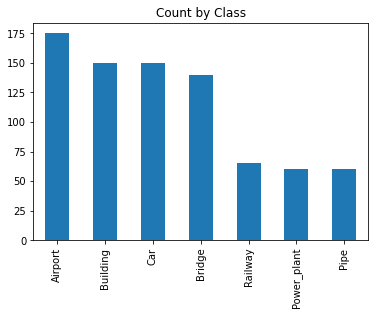

In [5]:
target_count = label.label.value_counts()
print('Class Airport:', target_count["Airport"])
print('Class Building:', target_count["Building"])
print('Class Car:', target_count["Car"])
print('Class Bridge:', target_count["Bridge"])
print('Class Railway:', target_count["Railway"])
print('Class Pipe:', target_count["Pipe"])
print('Class Power_plant:', target_count["Power_plant"])

target_count.plot(kind='bar', title='Count by Class');

In [6]:

#files = os.listdir("E://graduate/EE second spring/AIPI540/CVs_project/dddd/")
files = os.listdir("./dddd/")
print(set([x.split(".")[1] for x in files]))

{'jpeg', 'png', 'jpg'}


In [7]:
# path = glob.glob("E://graduate/EE second spring/AIPI540/CVs_project/dddd/*.jpg")

extensions = ("*.png","*.jpg","*.jpeg",)
path = []
for extension in extensions:
    path.extend(glob.glob("./dddd/"+extension))

In [8]:
path

['./dddd/image_740.png',
 './dddd/image_763.png',
 './dddd/image_762.png',
 './dddd/image_193.jpg',
 './dddd/image_187.jpg',
 './dddd/image_178.jpg',
 './dddd/image_150.jpg',
 './dddd/image_144.jpg',
 './dddd/image_15.jpg',
 './dddd/image_29.jpg',
 './dddd/image_226.jpg',
 './dddd/image_232.jpg',
 './dddd/image_233.jpg',
 './dddd/image_227.jpg',
 './dddd/image_28.jpg',
 './dddd/image_14.jpg',
 './dddd/image_145.jpg',
 './dddd/image_151.jpg',
 './dddd/image_179.jpg',
 './dddd/image_186.jpg',
 './dddd/image_192.jpg',
 './dddd/image_184.jpg',
 './dddd/image_190.jpg',
 './dddd/image_147.jpg',
 './dddd/image_153.jpg',
 './dddd/image_16.jpg',
 './dddd/image_219.jpg',
 './dddd/image_231.jpg',
 './dddd/image_225.jpg',
 './dddd/image_224.jpg',
 './dddd/image_230.jpg',
 './dddd/image_218.jpg',
 './dddd/image_17.jpg',
 './dddd/image_152.jpg',
 './dddd/image_146.jpg',
 './dddd/image_191.jpg',
 './dddd/image_185.jpg',
 './dddd/image_181.jpg',
 './dddd/image_195.jpg',
 './dddd/image_142.jpg',
 './dd

In [9]:
transform = transforms.Resize((500,500))

In [10]:
cv_img = []
for img in path:
    n = torch.flatten(transform(torch.permute(torch.tensor(cv.imread(img)),(2,0,1))))
    cv_img.append(np.array(n))

In [11]:
cv_img[0]

array([110, 109, 112, ...,   6,   6,   6], dtype=uint8)

In [12]:
#nor_flatten=[]

#for idx in cv_img:
    #m = (idx-idx.mean())/idx.std()
    #nor_flatten.append(m)

In [13]:
#nor_flatten

In [14]:
classes = ['Pipe', 'Bridge', 'Power_plant', 'Airport', 'Railway', 
           'Building', 'Car']

In [15]:
X = np.array(cv_img)

In [16]:
y = np.array(label)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [18]:
rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=1,n_estimators=100,
                                 max_features=0.1,max_samples=0.5,random_state=0)




In [ ]:
rf = rf_model.fit(X_train, y_train)

In [18]:
test_preds = rf_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 35.225
